# Análisis Exploratorio de Datos para predecir ictus en personas

In [624]:
import numpy as np
import pandas as pd 

In [625]:
df = pd.read_csv('brain_stroke_plus.csv')

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0


In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5516 entries, 0 to 5515
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5516 non-null   object 
 1   age                5516 non-null   float64
 2   hypertension       5516 non-null   int64  
 3   heart_disease      5516 non-null   int64  
 4   ever_married       5516 non-null   object 
 5   work_type          5516 non-null   object 
 6   Residence_type     5516 non-null   object 
 7   avg_glucose_level  5516 non-null   float64
 8   bmi                5376 non-null   float64
 9   smoking_status     5371 non-null   object 
 10  stroke             5516 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 474.2+ KB


In [627]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5516.000000,5516.000000,5516.000000,5516.000000,5376.000000,5516.000000
mean,45.832364,0.111131,0.073423,108.119755,28.584133,0.141951
std,23.071348,0.314323,0.260853,47.046806,6.792980,0.349031
min,0.080000,0.000000,0.000000,55.010000,14.000000,0.000000
25%,28.000000,0.000000,0.000000,77.520000,23.800000,0.000000
50%,48.000000,0.000000,0.000000,92.590000,28.200000,0.000000
75%,65.000000,0.000000,0.000000,116.215000,32.700000,0.000000
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000


In [628]:
duplicates = df.duplicated()
print(f"Número de filas duplicadas en el dataset inicial: {duplicates.sum()}")

Número de filas duplicadas en el dataset inicial: 0


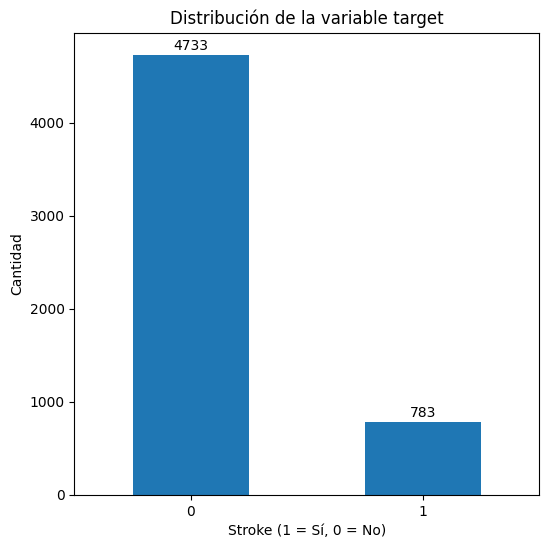

In [629]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['stroke'].value_counts().sort_index()

plt.figure(figsize=(6, 6))  # ancho=6, alto=4


ax = counts.plot(kind='bar')
plt.title('Distribución de la variable target')
plt.xlabel('Stroke (1 = Sí, 0 = No)')
plt.ylabel('Cantidad')

plt.xticks(rotation=0)

for i, v in enumerate(counts):
    ax.text(i, v + 50, str(v), ha='center', fontsize=10)

plt.show()

Vemos que el dataset está bastante desbalanceado:

- No ictus: 783
- Ictus: 4733

In [630]:
for col in df.columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {df[col].nunique()}")
    print("-------")

Columna: gender
Valores únicos: 2
-------
Columna: age
Valores únicos: 104
-------
Columna: hypertension
Valores únicos: 2
-------
Columna: heart_disease
Valores únicos: 2
-------
Columna: ever_married
Valores únicos: 2
-------
Columna: work_type
Valores únicos: 4
-------
Columna: Residence_type
Valores únicos: 2
-------
Columna: avg_glucose_level
Valores únicos: 4246
-------
Columna: bmi
Valores únicos: 347
-------
Columna: smoking_status
Valores únicos: 4
-------
Columna: stroke
Valores únicos: 2
-------


In [631]:
discarded_columns = ["age", "avg_glucose_level", "bmi"]

for col in df.columns:
    if col not in discarded_columns:
        print(f"Columna: {col}")
        print(f"Valores únicos: {df[col].unique()}")
        print("-------")

Columna: gender
Valores únicos: ['Male' 'Female']
-------
Columna: hypertension
Valores únicos: [0 1]
-------
Columna: heart_disease
Valores únicos: [0 1]
-------
Columna: ever_married
Valores únicos: ['No' 'Yes']
-------
Columna: work_type
Valores únicos: ['children' 'Private' 'Self-employed' 'Govt_job']
-------
Columna: Residence_type
Valores únicos: ['Rural' 'Urban']
-------
Columna: smoking_status
Valores únicos: ['Unknown' 'never smoked' 'formerly smoked' 'smokes' nan]
-------
Columna: stroke
Valores únicos: [0 1]
-------


In [632]:
unknwon_count = (df['smoking_status'] == "Unknown").sum()
print(f"Número de filas con 'smoking_status' como 'Unknown': {unknwon_count}")

Número de filas con 'smoking_status' como 'Unknown': 1453


Vemos que en la columna "smoking_status" ahora hay variables NaN, por lo que decidimos rellenarlos con "Unknown".

In [633]:
df.fillna({"smoking_status": "Unknown"}, inplace=True)

## Normalización y transformación de los datos

- "gender": convertir de objeto a binario
- "ever_married": convertir de objeto a binario
- "work_type": convertir de objeto a binario
- "Residence_type": convertir de objeto a binario
- "smoking_status": convertir de objeto a binario

In [634]:
# lista de columnas categóricas a convertir
multiclass_columns = ["work_type", "smoking_status", "gender"]

# usamos get_dummies para convertir las columnas categóricas en variables dummy
df = pd.get_dummies(df, columns=multiclass_columns)

# aseguramos que los dummies están como enteros (0/1)
dummy_cols = [col for col in df.columns if any(prefix in col for prefix in multiclass_columns)]
df[dummy_cols] = df[dummy_cols].astype(int)

In [635]:
binary_columns = ["ever_married", "Residence_type"]
mapping_dict = {
    "ever_married": {"Yes": 1, "No": 0},
    "Residence_type": {"Urban": 1, "Rural": 0}
}

for col in binary_columns:
    df[col] = df[col].map(mapping_dict[col])

In [636]:
df.isna().sum()

age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               140
stroke                              0
work_type_Govt_job                  0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
gender_Female                       0
gender_Male                         0
dtype: int64

Vemos que hay 140 filas con "bmi" "nan" y procedemos a imputarlos con la mediana.

In [637]:
bmi_median = df["bmi"].median()

df["bmi"] = df["bmi"].fillna(bmi_median)

In [638]:
df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Govt_job                0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
gender_Female                     0
gender_Male                       0
dtype: int64

In [639]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,3.0,0,0,0,0,95.12,18.0,0,0,0,0,1,1,0,0,0,0,1
1,58.0,1,0,1,1,87.96,39.2,0,0,1,0,0,0,0,1,0,0,1
2,8.0,0,0,0,1,110.89,17.6,0,0,1,0,0,1,0,0,0,1,0
3,70.0,0,0,1,0,69.04,35.9,0,0,1,0,0,0,1,0,0,1,0
4,52.0,0,0,1,1,77.59,17.7,0,0,1,0,0,0,1,0,0,1,0


In [640]:
df.duplicated().sum()

np.int64(0)

In [641]:
df.to_csv("better_dataset.csv", index=False)